# Evaluation of the Inaccuracy class

In [1]:
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

from nescience.inaccuracy import Inaccuracy

In [2]:
rcParams['figure.figsize'] = 10, 5

## Inaccuracy of a Model

In [3]:
X, y = load_digits(return_X_y=True)

In [4]:
tree = DecisionTreeClassifier(min_samples_leaf=5)
tree.fit(X, y)

DecisionTreeClassifier(min_samples_leaf=5)

In [5]:
inacc = Inaccuracy(y_type="categorical")
inacc.fit(X, y)

Inaccuracy(y_type='categorical')

In [6]:
inacc.inaccuracy_model(tree)

0.17422494529090926

We can also work directly with the set of predictions, instead of using the model. This allow us to compute the inaccuracy of models not implemented by scikit-learn.

In [7]:
pred = tree.predict(X)

In [8]:
inacc.inaccuracy_predictions(pred)

0.17422494529090926

## Compare score with inaccuracy

In [9]:
X, y = load_digits(return_X_y=True)

In [10]:
inacc = Inaccuracy(y_type="categorical")
inacc.fit(X, y)

Inaccuracy(y_type='categorical')

Train a collection of decision tree classifers with different levels of depth, compute a classical score and the new inaccuracy metric, and compare results.

In [11]:
scores       = list()
inaccuracies = list()

for i in range(1, 20):
    
    tree = DecisionTreeClassifier(max_depth=i, random_state=42)
    tree.fit(X, y)
    
    scores.append(1 - tree.score(X, y))
    inaccuracies.append(inacc.inaccuracy_model(tree))

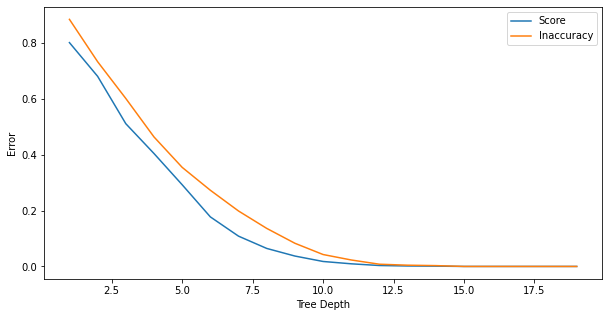

In [12]:
plt.plot(range(1,20), scores, label="Score")
plt.plot(range(1,20), inaccuracies, label="Inaccuracy")
plt.ylabel("Error")
plt.xlabel("Tree Depth")
plt.legend()
plt.show()

## Adding errors

Study the behavior of score and inaccuracy when we introduce more errors in the dataset.

In [13]:
tree = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree.fit(X, y)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [14]:
inacc.fit(X, y)
inacc.inaccuracy_model(tree)

0.17422494529090926

In [15]:
1 - tree.score(X, y)

0.07902058987200888

Let's see what happens if we make a hundred times the same error.

In [16]:
X2     = X.copy()
y2     = y.copy()
for i in np.arange(100):
    X2 = np.append(X2, [X[0]], axis=0)
    y2 = np.append(y2, (y[0]+1) % 10)

In [17]:
inacc.fit(X2, y2)
inacc.inaccuracy_model(tree)

0.20876669846881626

In [18]:
1 - tree.score(X2, y2)

0.12756984712704267

The theory of nescience states that making one hundred times the same error is not that bad. Let's see what happens if we make one hundred different errors.

In [19]:
X3     = X.copy()
y3     = y.copy()
for i in np.arange(100):
    index  = np.random.randint(X.shape[0])
    X3     = np.append(X3, [X[index]], axis=0)
    y3     = np.append(y3, (y[index]+1) % 10)

In [20]:
inacc.fit(X3, y3)
inacc.inaccuracy_model(tree)

0.24839969620450067

In [21]:
1 - tree.score(X3, y3)

0.12704269899841858

Making one hundred different errors is worse than making one hundred times the same error.

## Imbalanced dataset

Study the behaviour of score and inaccuracy in a highly imbalanced dataset.

In [22]:
from sklearn.datasets import make_classification

In [23]:
depth = list()
score = list()
inacc = list()

inaccuracy = Inaccuracy(y_type="categorical")

for i in np.arange(1, 100):
                    
    X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                               class_sep=2, flip_y=0, weights=[0.95,0.05])

    inaccuracy.fit(X, y)
        
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    tree.fit(X, y)

    depth.append(i)        
    score.append(1 - tree.score(X, y))
    inacc.append(inaccuracy.inaccuracy_model(tree))

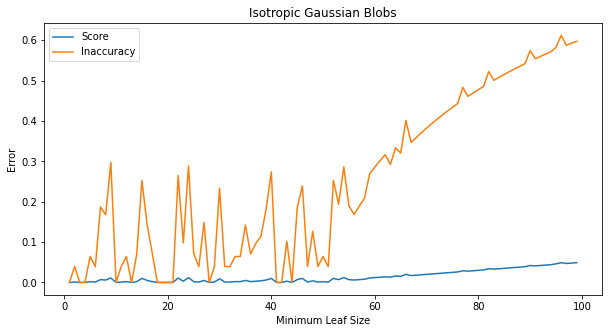

In [24]:
plt.plot(depth, score, label="Score")
plt.plot(depth, inacc, label="Inaccuracy")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("Error")
plt.xlabel("Minimum Leaf Size")
plt.legend(loc='best')

As we can see, the scoring metric is not able to work with imbalanced datasets, a problem that is not suffered by the new inaccuracy metric.